In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 9: Hilberttransformation II

![Blockdiagramm](figures/A9/System_Blockdiagramm.png)

Ein Tiefpasssignal habe die unten abgebildete Fouriertransformierte $X(j\omega)$. Das Signal wird auf das abgebildete System gegeben, wobei  $\omega_0 > W$ ist. $H_{H}$ sei der Hilberttransformator.

Skizzieren sie $X_i(j\omega$) für $i = 1,...,7$.

#### Fouriertransformierte von $x(t)$:

In [2]:
def half_trapz(omega, W):
    return 1.0*np.minimum(1, 2 - 2*omega/W)*(omega < W)*(omega > 0)

def full_trapz(omega, W):
    return half_trapz(omega, W) + half_trapz(-omega, W)

def plot_spectrum(omega, X, xlabel=r'$\omega/W$', ylabel=''):
    plt.axvline(linewidth=0.75, color='k')
    plt.plot(omega, X, lw=4);
    plt.axhline(linewidth=0.75, color='k')
    plt.ylim((1.5*min(X), 1.5*max(X)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True);

In [3]:
omega = np.linspace(-10, 10, 10000)
W = 2
omega_0 = 3

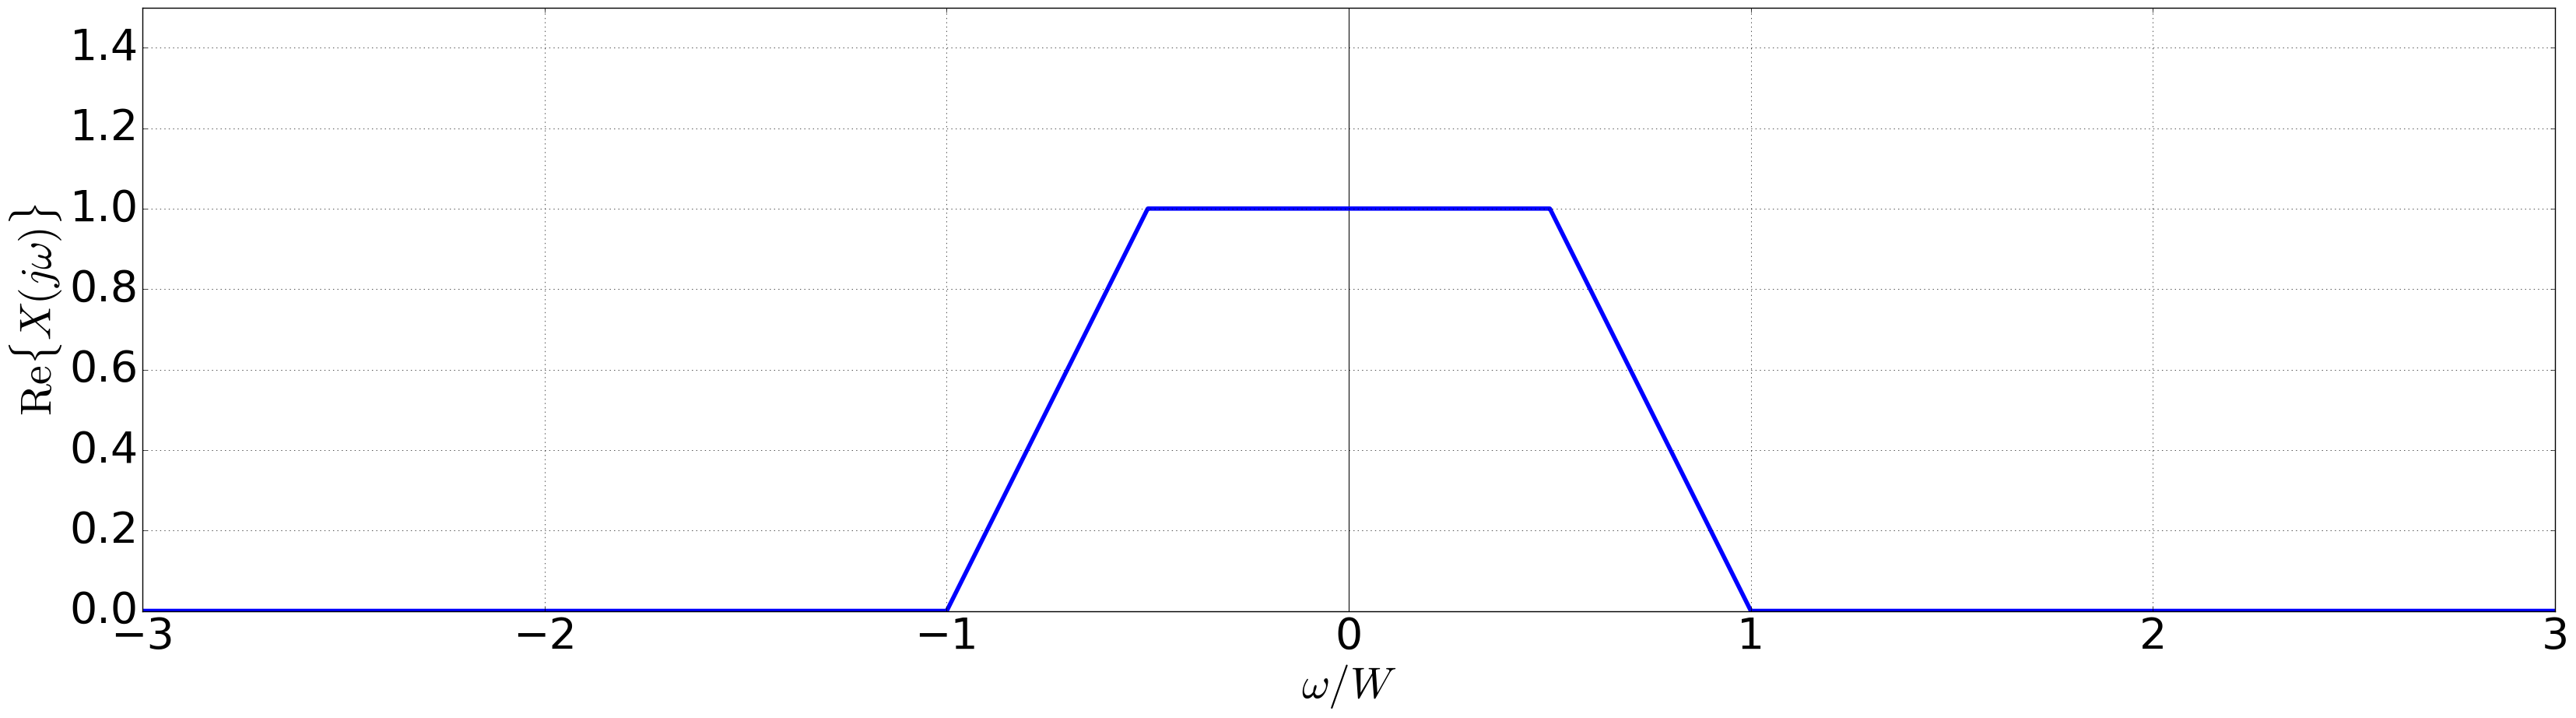

In [4]:
X_w = full_trapz(omega, W)
plot_spectrum(omega/W, X_w, ylabel=r'$\mathrm{Re}\{X(j\omega)\}$')
plt.xlim((-3, 3));

1)

\begin{align}
    x_1(t) &= x(t) \cdot \sin(\omega_0 t) \\
    \Rightarrow X_1(j\omega) &= \frac{1}{2 \pi}  X(j\omega) \ast \left(j\pi \left( \delta(\omega + \omega_0) - \delta(\omega - \omega_0) \right) \right) \\
    &= \frac{j}{2} \left( X(j(\omega + \omega_0)) - X(j(\omega - \omega_0)) \right)
\end{align}

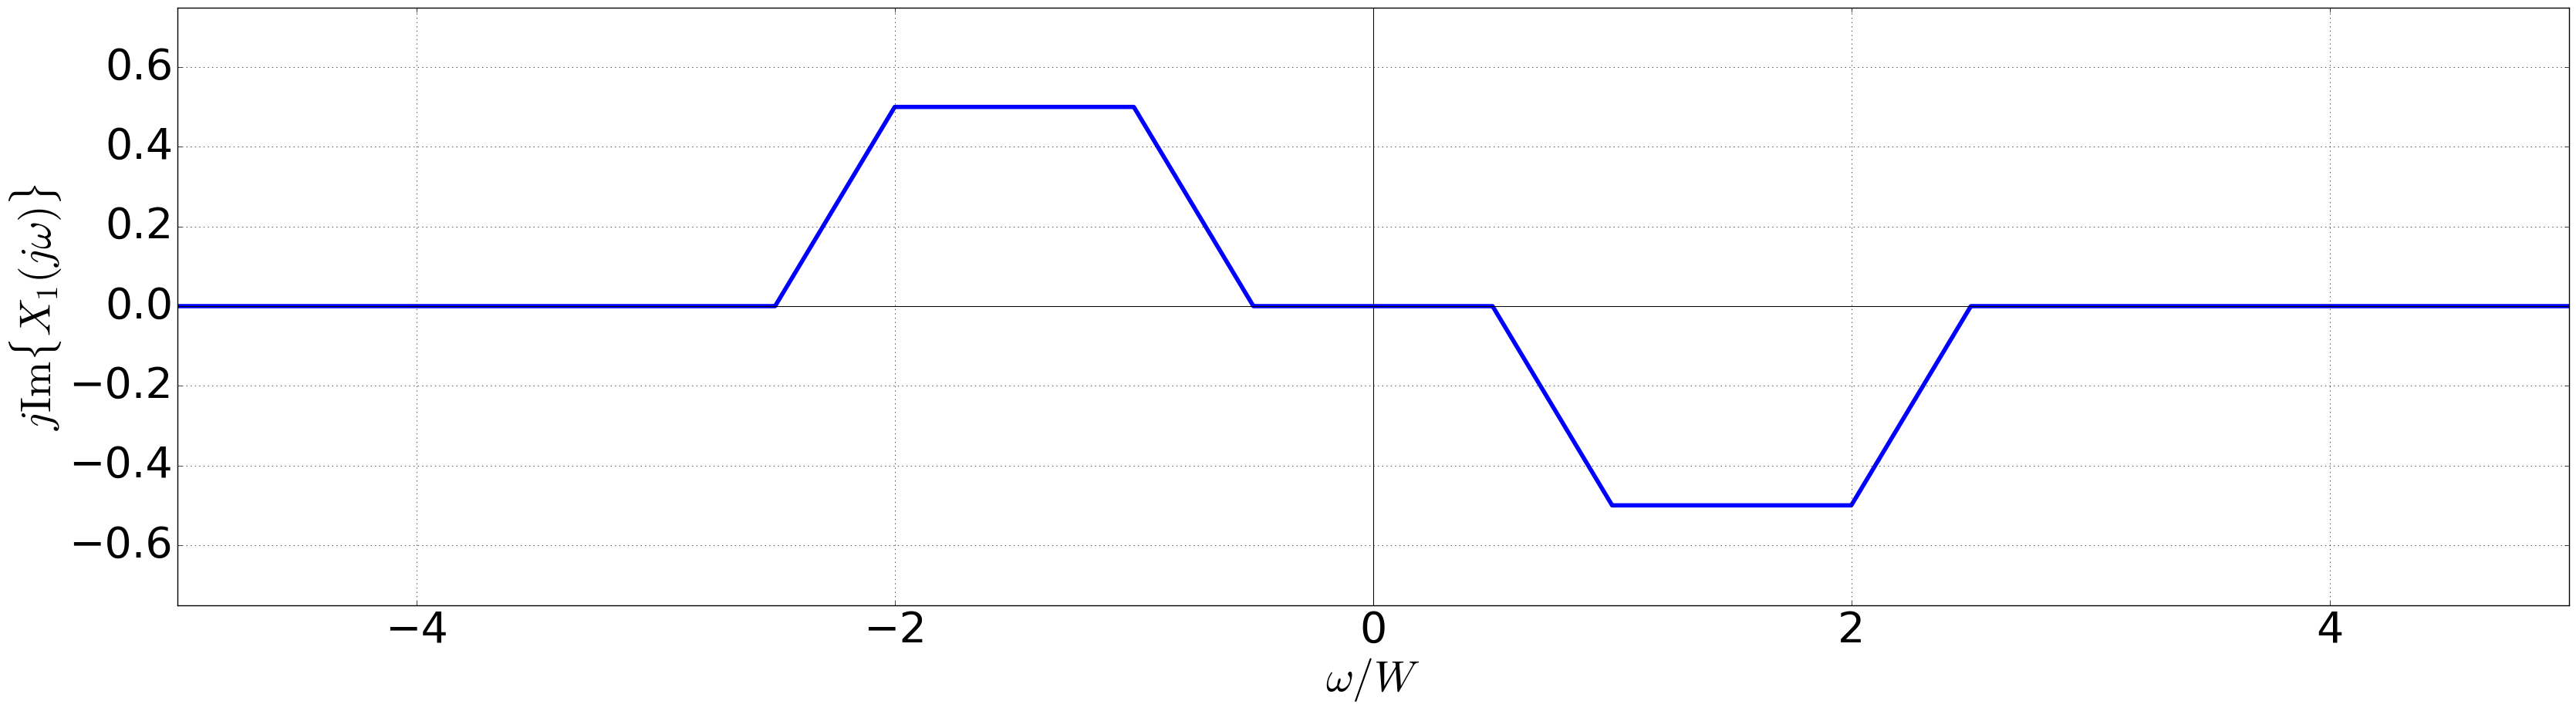

In [5]:
X1_w = 1/2*(full_trapz(omega + omega_0, W) - full_trapz(omega - omega_0, W))
plot_spectrum(omega/W, X1_w, ylabel=r'$j\mathrm{Im}\{X_1(j\omega)\}$')
plt.xlim((-5, 5));

2)

\begin{align}
    x_2(t) &= H_H \left\{ x(t) \right\} \\
    \Rightarrow X_2(j\omega) &= -j\mathrm{sgn}(\omega) \cdot X(j\omega) \\
\end{align}

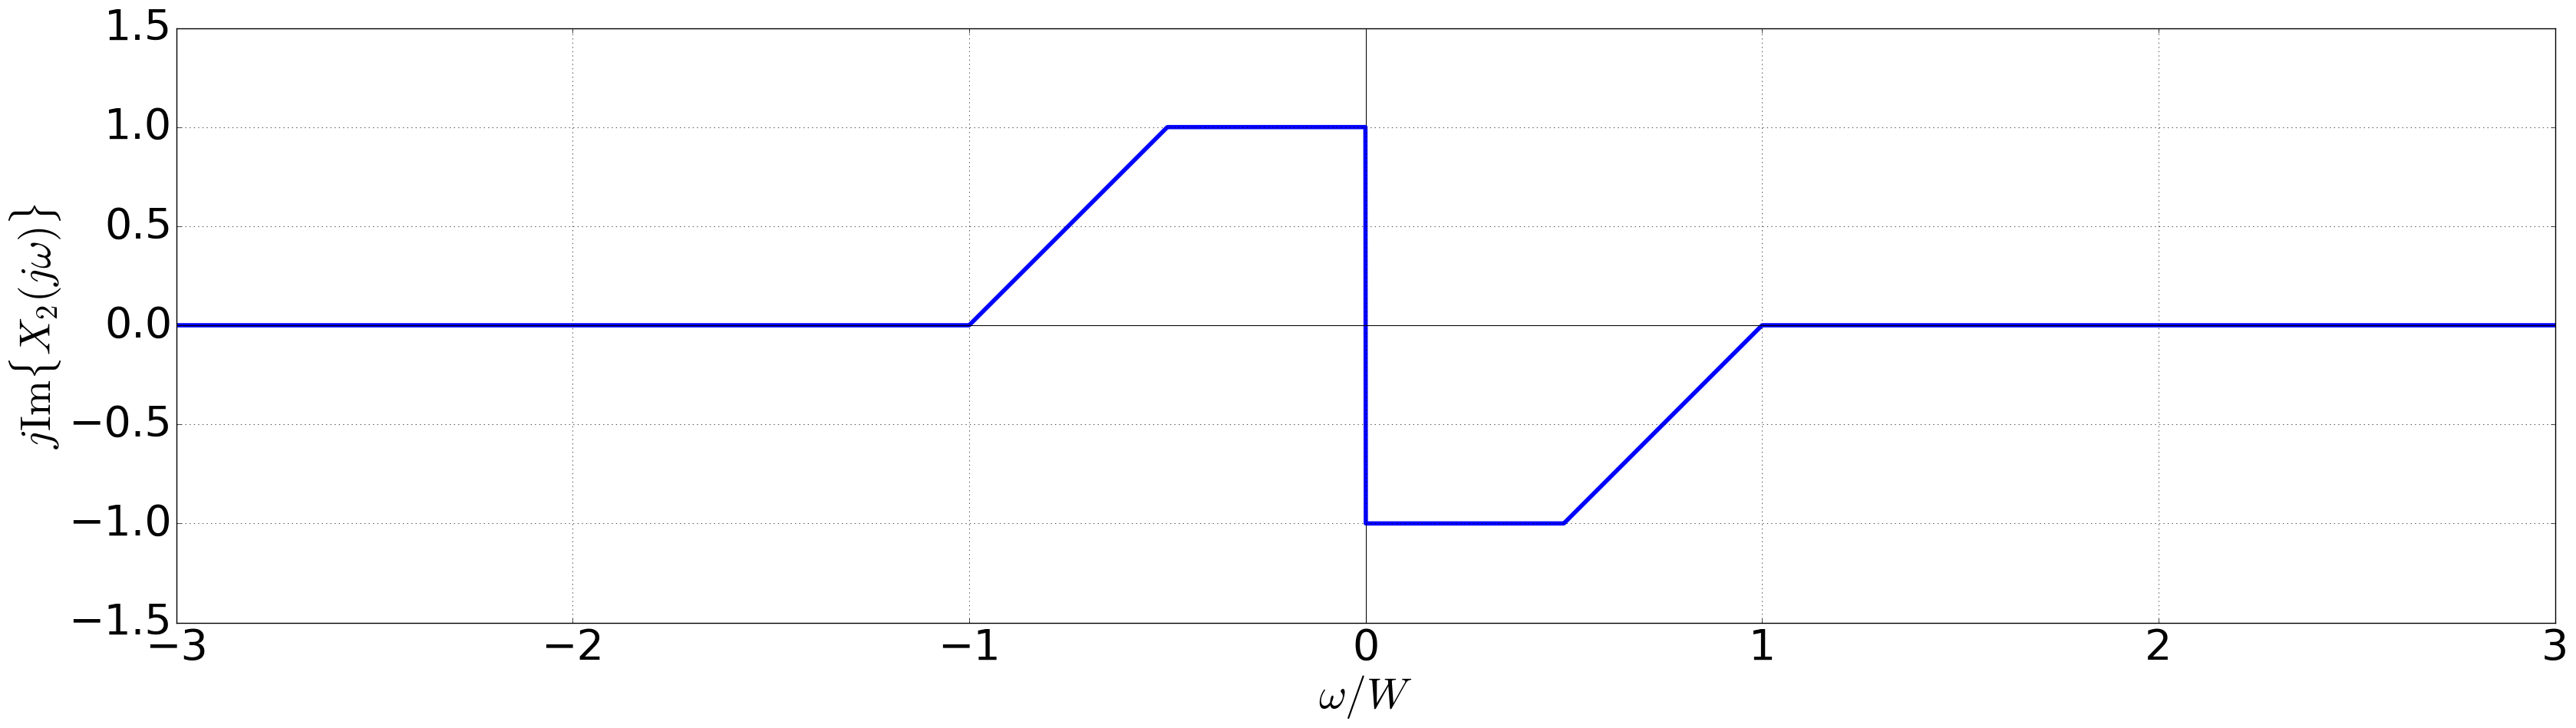

In [6]:
X2_w = full_trapz(omega, W)*(-np.sign(omega))
plot_spectrum(omega/W, X2_w, ylabel=r'$j\mathrm{Im}\{X_2(j\omega)\}$')
plt.xlim((-3, 3));

3)

\begin{align}
        x_3(t) &= H_H\left\{ x_1(t) \right \} \\
        \Rightarrow X_3(j\omega) &= -j\mathrm{sgn}(\omega) \cdot X_1(j\omega) \\
        &= \frac{1}{2} \left( X(j(\omega - \omega_0)) - X(j(\omega + \omega_0)) \right)
\end{align}

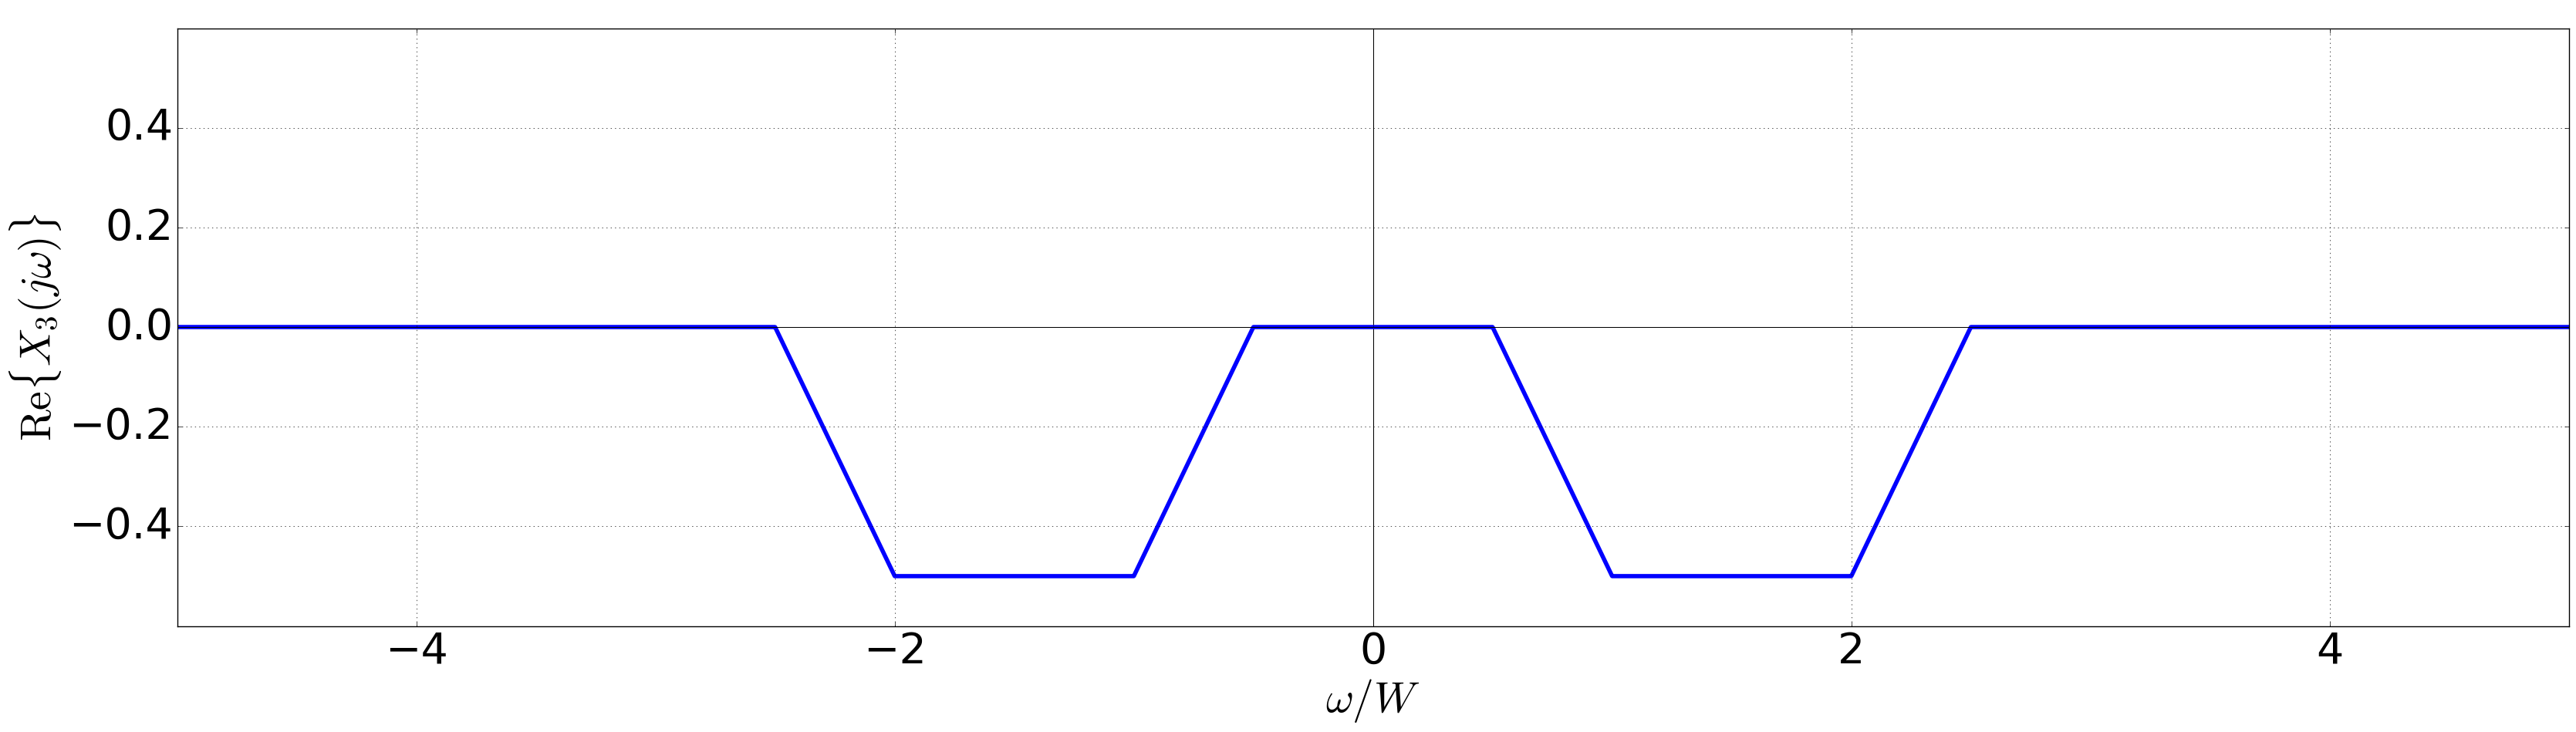

In [7]:
X3_w =  -1/2*(full_trapz(omega - omega_0, W) + full_trapz(omega + omega_0, W))
plot_spectrum(omega/W, X3_w, ylabel=r'$\mathrm{Re}\{X_3(j\omega)\}$')
plt.xlim((-5, 5));
plt.ylim((-0.6, 0.6));

4)

\begin{align}
    x_4(t) &= x_2(t) \cdot \sin(\omega_0 t) \\
    \Rightarrow X_4(j\omega) &= \frac{1}{2 \pi}  X_2(j\omega) \ast \left(j\pi \left( \delta(\omega + \omega_0) - \delta(\omega - \omega_0) \right) \right) \\
    &= \frac{1}{2} \left( \left(\mathrm{sgn}(\omega) \cdot X(j\omega)\right) \ast \delta(j(\omega + \omega_0)) - \left(\mathrm{sgn}(\omega) \cdot X(j\omega)\right) \ast \delta(j(\omega - \omega_0)) \right)
\end{align}

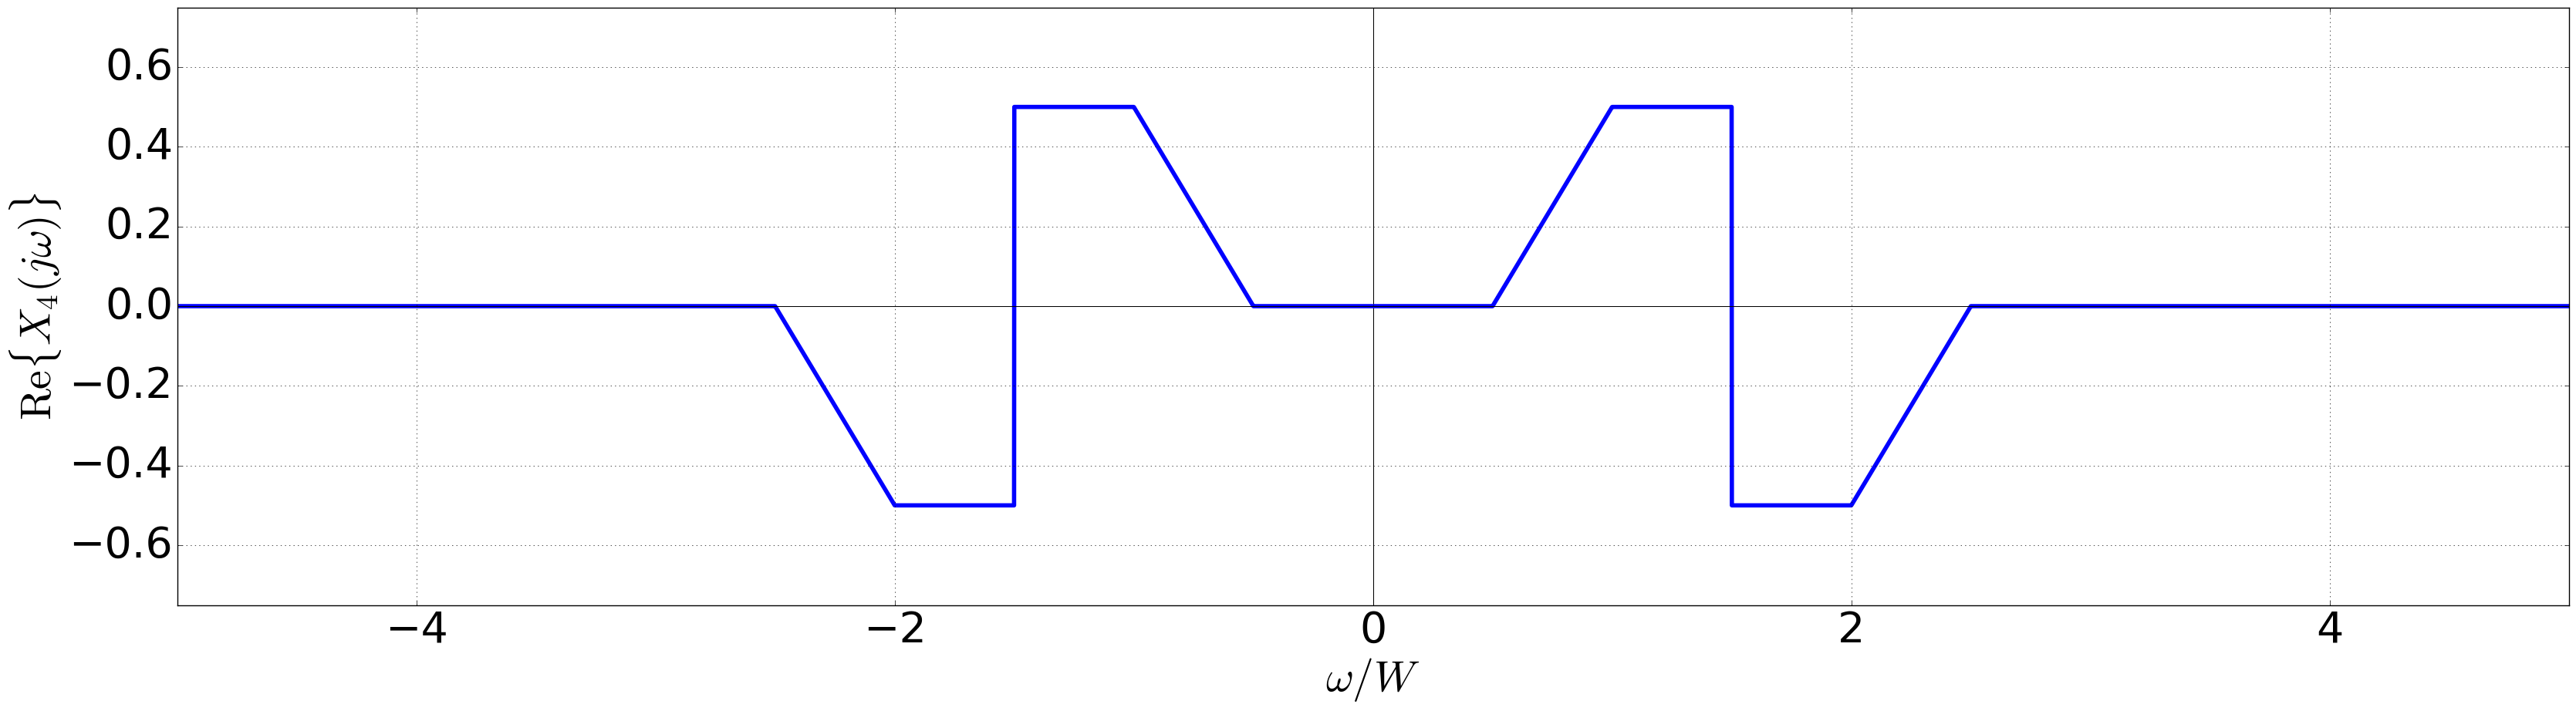

In [8]:
X4_w = 1/2*(full_trapz(omega + omega_0, W)*(np.sign(omega + omega_0)) -
            full_trapz(omega - omega_0, W)*(np.sign(omega - omega_0)) )
plot_spectrum(omega/W, X4_w, ylabel=r'$\mathrm{Re}\{X_4(j\omega)\}$')
plt.xlim((-5, 5));

5)

\begin{align}
    x_5(t) &= x_4(t) - x_3(t) \\
    \Rightarrow X_5(j\omega) &= X_4(j\omega) - X_3(j\omega)
\end{align}

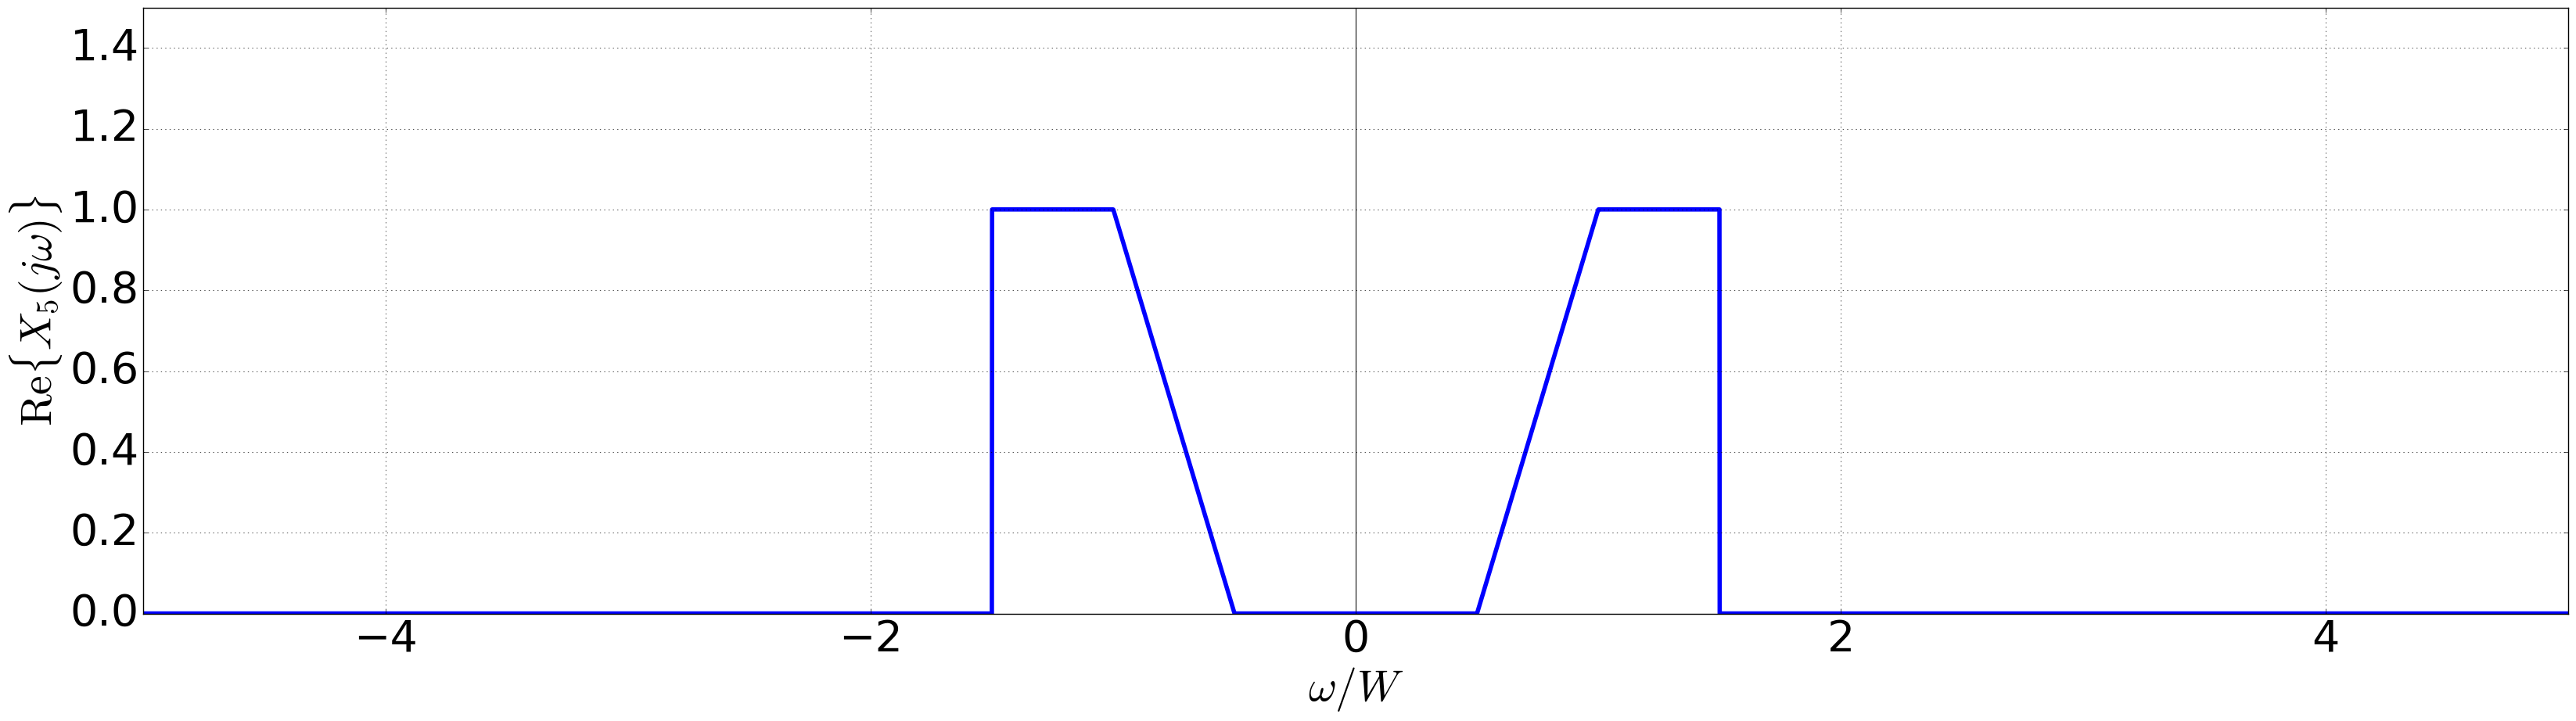

In [9]:
X5_w = half_trapz(omega + omega_0, W) + half_trapz(-(omega - omega_0), W)
plot_spectrum(omega/W, X5_w, ylabel=r'$\mathrm{Re}\{X_5(j\omega)\}$')
plt.xlim((-5, 5));

6)

\begin{align}
    x_6(t) &= x_5(t) \cdot 2 \cos(\omega_0 t) \\
    \Rightarrow X_6(j\omega) &= \frac{1}{\pi} X_5(j\omega) \ast \left( \pi \left(\delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right) \right) \\
    &= X_5(j\omega) \ast \left(\left(\delta(\omega - \omega_0) + \delta(\omega + \omega_0) \right) \right)
\end{align}

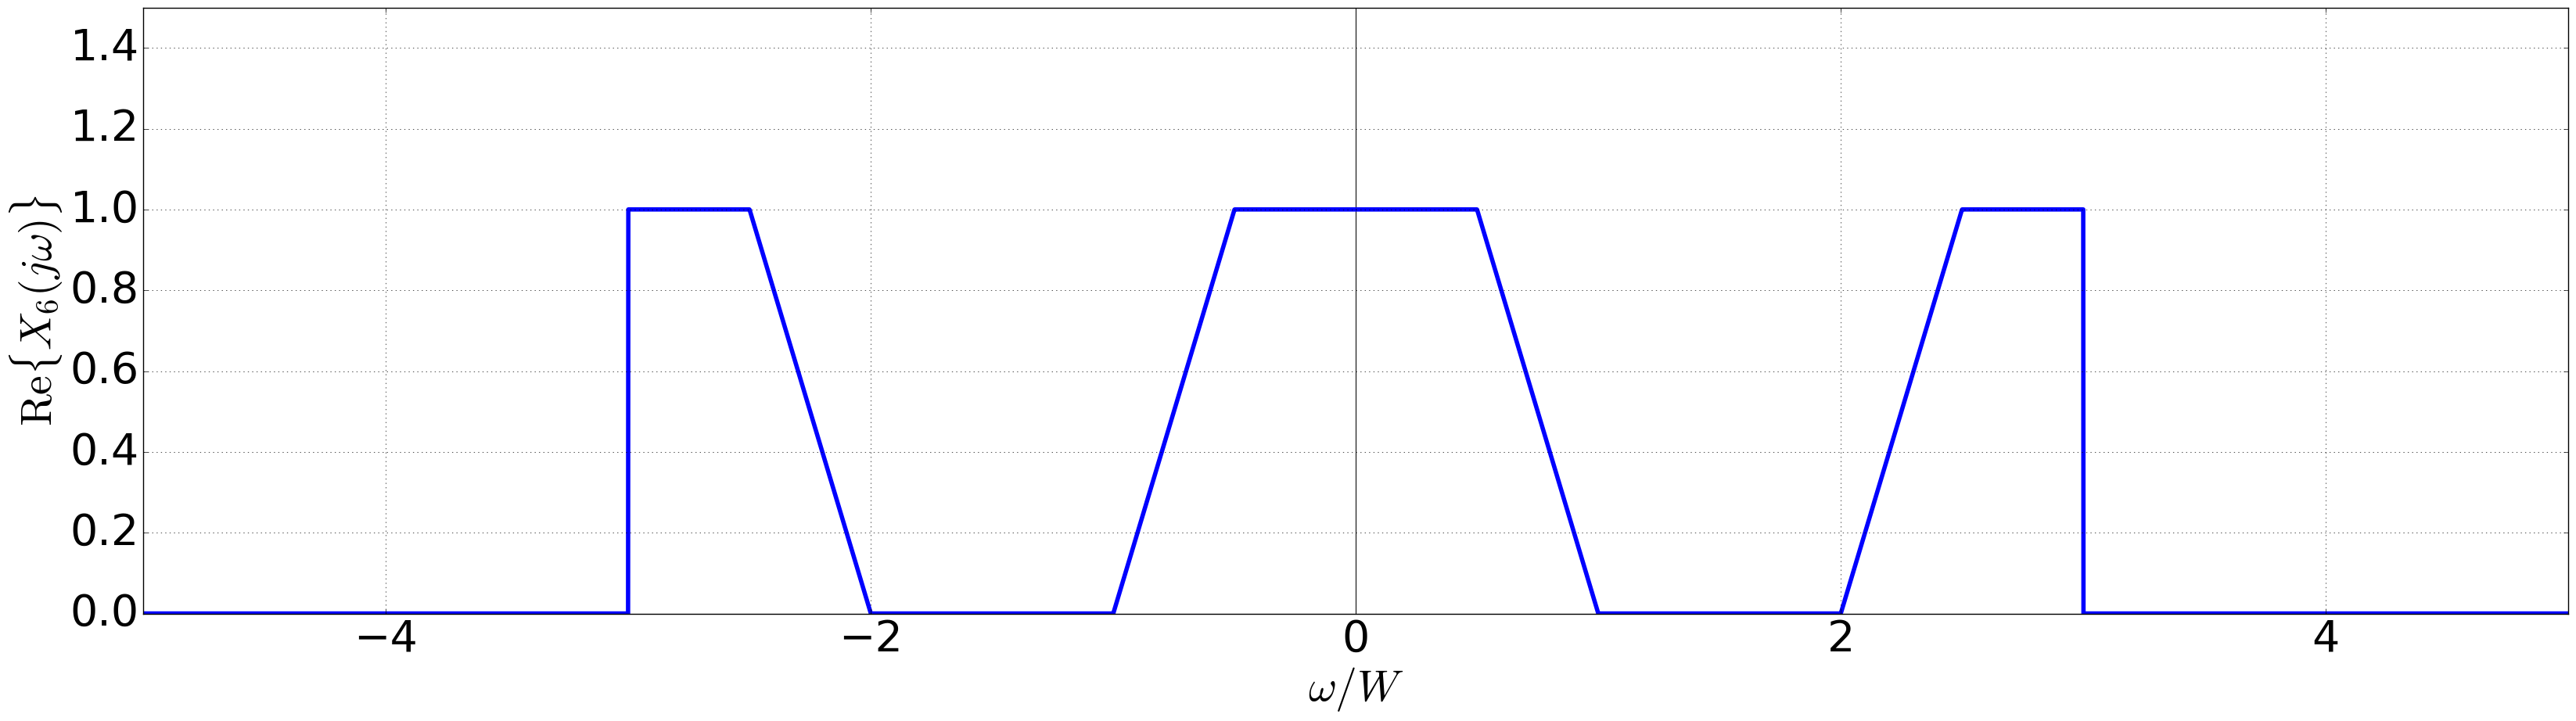

In [10]:
X6_w = full_trapz(omega, W) + half_trapz(omega + 2*omega_0, W) + half_trapz(-(omega - 2*omega_0 ), W)
plot_spectrum(omega/W, X6_w, ylabel=r'$\mathrm{Re}\{X_6(j\omega)\}$')
plt.xlim((-5, 5));

7)

\begin{align}
        x_7(t) &= \mathrm{TP}_{[-W, W]}\left\{ x_6(t) \right\} \\
        \Rightarrow X_7(j\omega) &= X_6(j\omega) \cdot \mathrm{rect} \left( \frac{\omega}{2W} \right)
\end{align}

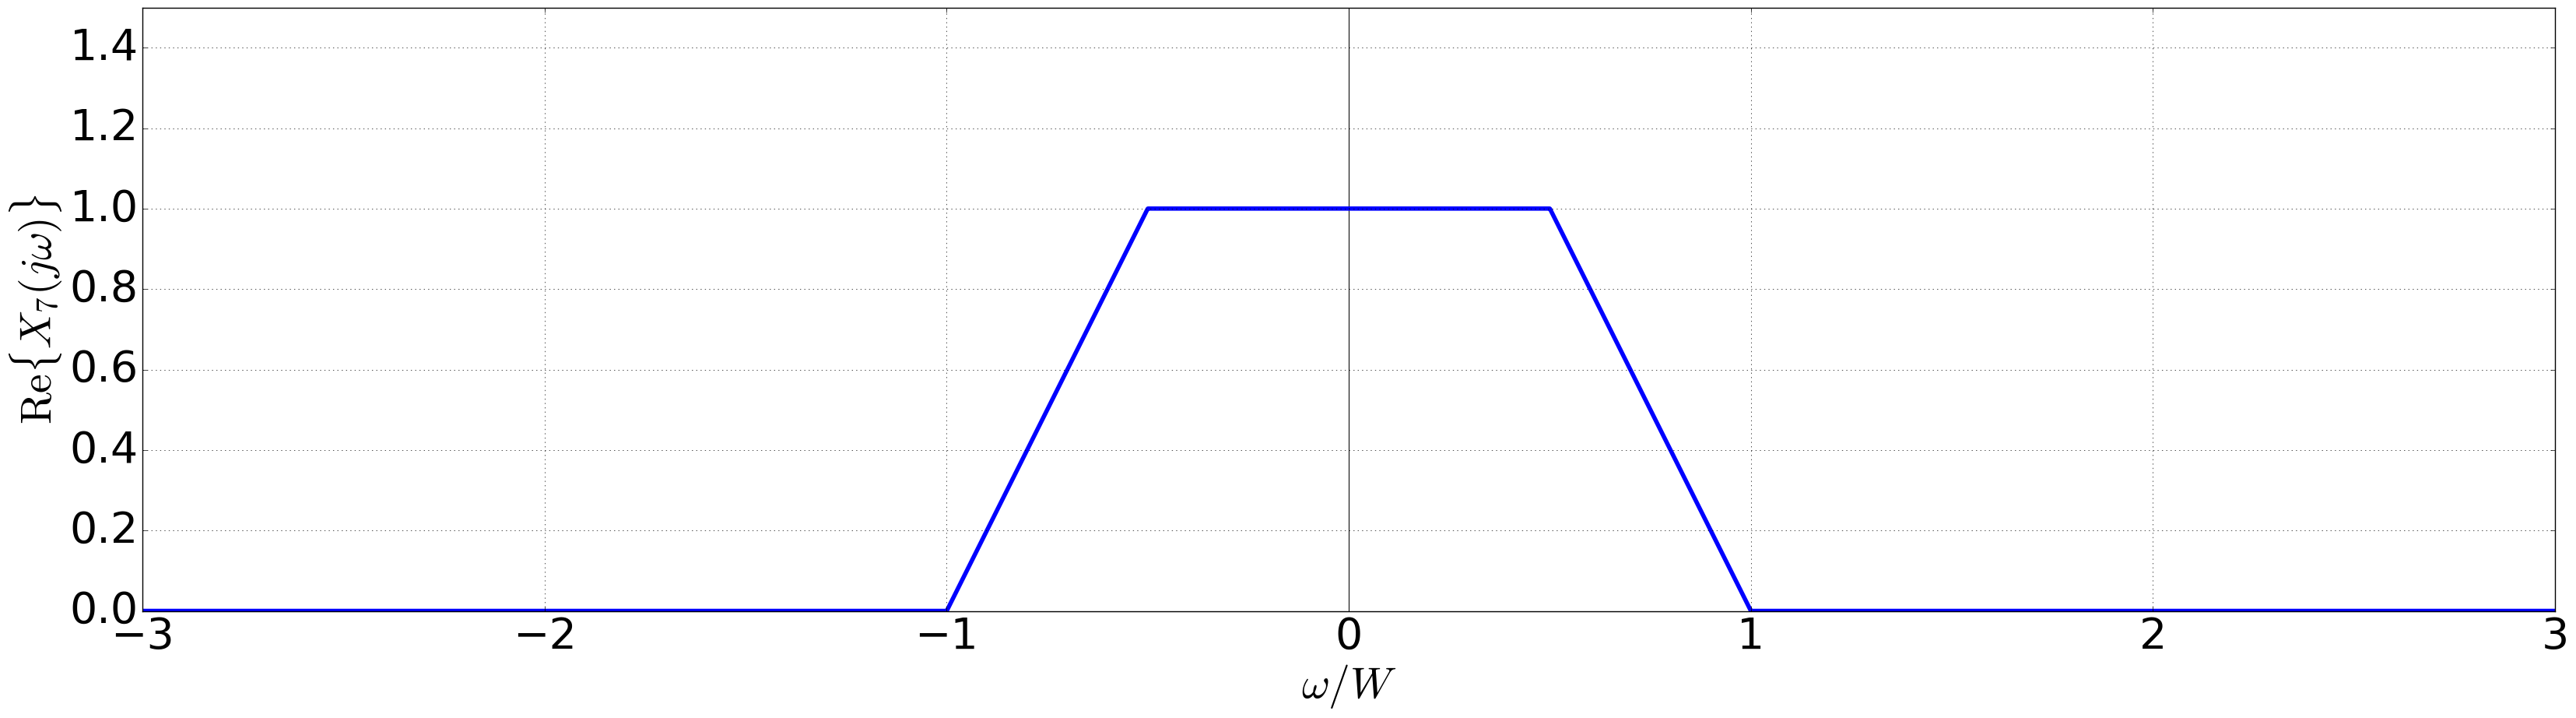

In [11]:
X7_w = full_trapz(omega, W)
plot_spectrum(omega/W, X_w, ylabel=r'$\mathrm{Re}\{X_7(j\omega)\}$')
plt.xlim((-3, 3));